In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [9]:
df=pd.read_csv('datatraining.txt')

In [10]:
dates = pd.to_datetime(df['date'], infer_datetime_format=True)
df['day'] = dates.dt.day
df['month'] = dates.dt.month
df['year'] = dates.dt.year
df['hour'] = dates.dt.hour

In [11]:
weekend = []
for i in df.day:
    if i == 7 or i == 8:
        weekend.append(True)
    else:
        weekend.append(False)
weekend = pd.Series(weekend)
df['weekend'] = weekend

In [20]:
daylight = []
for i in df.hour:
    if i >= 7 and i <= 17:
        daylight.append(True)
    else:
        daylight.append(False)
daylight = pd.Series(daylight)
df['daylight'] = daylight

In [21]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,month,year,hour,weekend,daylight
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,4,2,2015,17,False,True
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,4,2,2015,17,False,True
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,4,2,2015,17,False,True
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,4,2,2015,17,False,True
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,4,2,2015,17,False,True


In [22]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,month,year,hour
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.0,8143.0,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330,7.075525,2.0,2015.0,11.390642
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982,1.674896,0.0,0.0,7.092195
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,4.000000,2.0,2015.0,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000,6.000000,2.0,2015.0,5.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000,7.000000,2.0,2015.0,11.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000,8.000000,2.0,2015.0,18.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,10.000000,2.0,2015.0,23.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 13 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
day              8143 non-null int64
month            8143 non-null int64
year             8143 non-null int64
hour             8143 non-null int64
weekend          8142 non-null object
daylight         8142 non-null object
dtypes: float64(5), int64(5), object(3)
memory usage: 890.6+ KB


Text(0, 0.5, 'Occupancy frequency')

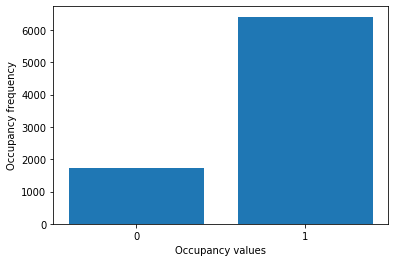

In [19]:
plt.bar(x=df.Occupancy.unique(), height=df.Occupancy.value_counts())
plt.xticks(df.Occupancy.unique())
plt.xlabel('Occupancy values')
plt.ylabel('Occupancy frequency')

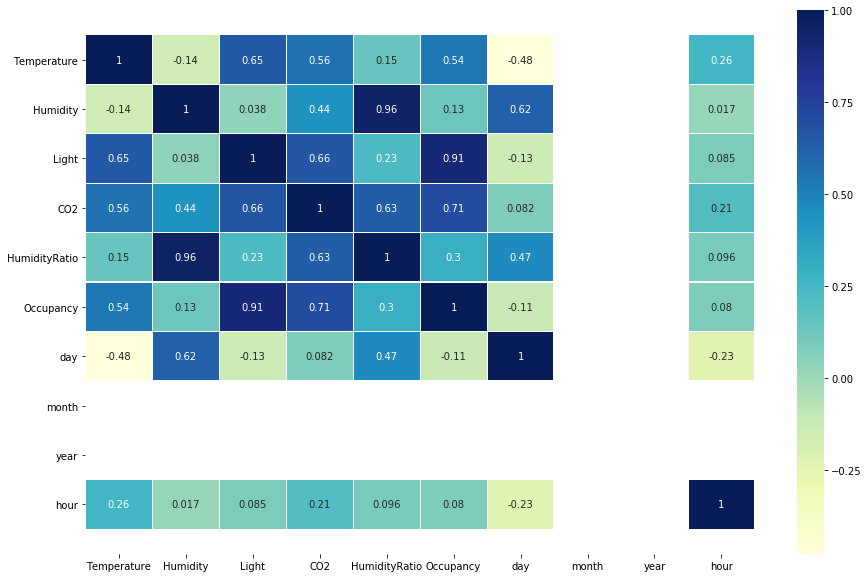

In [24]:

#Correlation Pearson (linear correlation)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot = True, linewidth=0.1, cmap='YlGnBu')
#To fix matplot error
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
##
plt.show()